# Twitter API

La última clase vimos como registrarnos como developers en twitter. Ahora, utilizaremos las key obtenidas para extraer tweets y analizarlos.

Para esto, utilizaremos la librería tweepy (debemos instalarla)

Algunos links útiles:

- https://developer.twitter.com/en/portal/dashboard
- https://docs.tweepy.org/en/v3.5.0/api.html?highlight=search#API.search

Primero que nada instalamos tweepy:

In [1]:
# %pip install tweepy

In [ ]:
# %pip install ntscraper

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ntscraper import Nitter

In [2]:
scraper=Nitter(log_level=1,skip_instance_check=False)

Testing instances: 100%|██████████| 77/77 [02:25<00:00,  1.89s/it]


In [6]:
tweets=scraper.get_tweets("FIFA World Cup",mode="hashtag",number=200)

18-Feb-24 15:43:37 - No instance specified, using random instance https://nitter.mint.lgbt
18-Feb-24 15:43:52 - Current stats for FIFA World Cup: 6 tweets, 0 threads...
18-Feb-24 15:44:04 - Current stats for FIFA World Cup: 12 tweets, 0 threads...
18-Feb-24 15:44:16 - Current stats for FIFA World Cup: 16 tweets, 0 threads...
18-Feb-24 15:44:27 - Current stats for FIFA World Cup: 25 tweets, 0 threads...
18-Feb-24 15:44:39 - Current stats for FIFA World Cup: 36 tweets, 0 threads...
18-Feb-24 15:44:47 - Current stats for FIFA World Cup: 41 tweets, 0 threads...
18-Feb-24 15:44:54 - Current stats for FIFA World Cup: 46 tweets, 0 threads...
18-Feb-24 15:45:02 - Current stats for FIFA World Cup: 48 tweets, 0 threads...
18-Feb-24 15:45:08 - Fetching error: Instance has been rate limited.Use another instance or try again later.


In [2]:
from pprint import pprint

In [8]:
pprint(tweets['tweets'][0])

{'date': 'Feb 18, 2024 · 6:28 PM UTC',
 'external-link': '',
 'gifs': [],
 'is-pinned': False,
 'is-retweet': False,
 'link': 'https://twitter.com/RealPhatsBlog/status/1759283760535678986#m',
 'pictures': [],
 'quoted-post': {},
 'replying-to': [],
 'stats': {'comments': 0, 'likes': 0, 'quotes': 0, 'retweets': 0},
 'text': 'Premier League fixtures 2023-24: Schedule, how to watch live, dates, '
         'odds  #PhatzRadioSports #EuropaLeague #ChampionsLeague '
         '#PremierLeague #WorldCup #FACup #LaLiga #SerieA #Ligue1 #Bundesliga '
         '#EPL #MLS #CopaAmerica #FIFA '
         'https://www.nbcsports.com/soccer/news/premier-league-fixtures-2023-24-season-schedule-dates-how-to-watch-live',
 'user': {'avatar': 'https://pbs.twimg.com/profile_images/378800000731443958/ba87f358ff14085cc69b8789e471bb01_bigger.jpeg',
          'name': 'PhatzNewsRoom',
          'profile_id': '378800000731443958',
          'username': '@RealPhatsBlog'},
 'videos': []}


#### Función que devuelve un dataframe de tweets.

In [2]:
def ftweets(tw):
  data={
      'date':[],
      'user':[],
      'text':[],
      'likes':[],
      'comments':[],
      'retweets':[],
      'quotes':[],
  }

  for tw in tweets['tweets']:
    data['date'].append(tw['date'])
    data['user'].append(tw['user']['username'])
    data['text'].append(tw['text'])
    data['likes'].append(tw['stats']['likes'])
    data['comments'].append(tw['stats']['comments'])
    data['retweets'].append(tw['stats']['retweets'])
    data['quotes'].append(tw['stats']['quotes'])

  df=pd.DataFrame(data)
  return df


In [10]:
df2=ftweets(tweets)
df2.sample(5)

,date,user,text,likes,comments,retweets,quotes
44,"Feb 15, 2024 · 9:17 AM UTC",@MyNews_Ghana,Politics: Ekow Vincent nominated for Dep. Loca...,0,0,0,0
14,"Feb 17, 2024 · 6:40 AM UTC",@PyaraBetaa,This is old Gem Maradona preparing for the Wo...,0,0,0,0
4,"Feb 18, 2024 · 2:18 PM UTC",@1Stadia,"Sizzling action on the fifth day – goals, grit...",0,0,0,0
41,"Feb 15, 2024 · 9:19 AM UTC",@MyNews_Ghana,News: See Full List of 21 Former Finance Minis...,0,0,0,0
42,"Feb 15, 2024 · 9:18 AM UTC",@MyNews_Ghana,Politics: TV3 have learned to appreciate my co...,0,0,0,0


In [16]:
# df2.to_csv('twFifaWorldCup.csv')

Ahora, para hacer una request a la API de twitter, necesitaremos utilizar nuestras access keys. En la siguiente celda, poner sus keys obtenidas en el portal de tweeter developer.

*En caso de que no tengan cuenta de desarrollador en twitter, evitar esta parte.

In [4]:
# import tweepy

# consumer_key = '610oI49n9r2hfQi7unGEOSQlm'
# consumer_secret = '8wXgljKKk0DwezS7lis6qKYlrPb8yqTVrfl6O3gBszooPHKXrP'
# access_token = "1755588585158258688-4KVUWOcdWYg4Xrmzi9x0qpzMxHp1u1"
# access_token_secret = "8bRLxotE3Q0pwaHU6gfwr1ns1sSMvOFx4CCWIlyw7OBPc"

# bearer_token='AAAAAAAAAAAAAAAAAAAAAFEtsQEAAAAASblI6QygpHhKWJhuaagH0pAt7zg%3DDtuQ4x7AmtgxPP9dGjlpRYfVLMxxo0B7QZlDujuVKQMcDobSdM'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)

# api = tweepy.API(auth)


Ahora con nuestras keys podemos autenticarnos:

In [5]:
# # import tweepy
# query = "python"
# tweets = api.search_tweets(q=query, count=10)
# for tweet in tweets:
#     print(tweet.text)
#     break

In [6]:
#Instantiate the tweepy API
# api = tweepy.Client(bearer_token=bearer_token,consumer_key=consumer_key,consumer_secret=consumer_secret,access_token=access_token, access_token_secret=access_token_secret)

Si la celda anterior no les dio error, ya deberían estar autenticados.

Ahora con el siguiente código, podemos extraer por ejemplo algunos tweets de "get_home_timeline" (la página principal que aparece cuando iniciamos sesión en twitter).

In [7]:
# tweets = api.get_home_timeline()


In [ ]:
for tweet in list(tweets)[0]:
    print(tweet)
    print("----")

In [ ]:
tweets

Response(data=[<Tweet id=1596985880966991872 text='🚨 ATENCIÓN \n\n👉🏻 ¿Cómo quedó el Grupo C luego del triunfo de Argentina? \n\n📋Polonia ocupa el primer puesto. Si Argentina empata el miércoles la clasificación dependerá del partido entre México y Arabia Saudita, que jugará aquel día en el mismo horario.\n\n📲 https://t.co/9fxDe5Kt8s https://t.co/LcfLdaHcum'>, <Tweet id=1596985465864863745 text='Four professors, who formed the No Club, write for @NatureCareers that they’ve learned that when women refuse requests to do unrewarded tasks, another female colleague often gets asked instead. https://t.co/r1K2Gbyy6J'>, <Tweet id=1596985263921799169 text='RT @ucsbNLP: Our MS student Eddie Zhang will be presenting "LAD: Language Augmented Diffusion for Reinforcement Learning" at #NeurIPS 2022…'>, <Tweet id=1596984710688907265 text='El Gobierno ucraniano anunció la estabilización del sistema energético tras los bombardeos rusos https://t.co/BtG8aFCdyn'>, <Tweet id=1596984144436699136 text='El mis

Otra cosa que podemos hacer, es extraer tweets por keyword.

Por ejemplo:

In [ ]:
# query = 'FIFA World Cup -lang: es'
# tweets = api.search_recent_tweets(query=query, max_results=10)
# for tweet in tweets.data:
#     print(tweet.text)

Mediante la API de twitter también se puede publicar cosas, marcar favoritos, enviar mensajes, etc etc. Pero está fuera del alcance de esta clase. Por el momento nos interesa extraer tweets para tener datos para analizar.

Vamos a extraer 500 tweets sobre 'FIFA World Cup' y analizarlos con lo que vimos en la parte teórica de hoy.

EJERCICIO: Basándose en el código de arriba, extraer 100 tweets sobre covid, guardarlos en una lista y luego en un dataframe de pandas.

El dataframe debe tener la columna: "TWEET".

Arranquemos armando la lista de tweets:

In [17]:
scraper=Nitter(log_level=1,skip_instance_check=False)

Testing instances: 100%|██████████| 77/77 [02:25<00:00,  1.89s/it]


In [24]:
tweets=scraper.get_tweets("covid",mode="hashtag",number=200)

20-Feb-24 20:09:08 - No instance specified, using random instance https://nitter.tux.pizza
20-Feb-24 20:09:16 - Current stats for covid: 11 tweets, 0 threads...
20-Feb-24 20:09:21 - Current stats for covid: 19 tweets, 0 threads...
20-Feb-24 20:09:26 - Current stats for covid: 31 tweets, 0 threads...
20-Feb-24 20:09:28 - Fetching error: Instance has been rate limited.Use another instance or try again later.


In [ ]:
# query = 'FIFA World Cup -lang: es'
# mundial_tweets = api.search_recent_tweets(query=query, max_results=100)

# tweets_list = []


In [ ]:
# for tw in list(mundial_tweets)[0]:
#   tw_text = tw.text
#   tweets_list.append(tw_text)

Validar que el largo de la lista sea 100:

In [ ]:
# len(tweets_list)

100

Imprimir los primeros 5 tweets de la lista:

In [ ]:
# tweets_list[:15]

A simple vista... ¿Cuáles son los principales desafíos que ven a la hora de trabajar con textos como estos?

Ahora crear un dataframe de pandas a partir de la lista de tweets.

In [ ]:
# import pandas as pd

# df = pd.DataFrame(tweets_list, columns=["TWEET"])
# df.sample(10)

In [3]:
# df.to_csv("./tweets.csv", index=False)
df = pd.read_csv('tweets.csv')

Ya tenemos nuestro dataset, ahora comencemos el análisis

### Named entity recognition "Reconocimiento de entidades nombradas".

Named entity recognition (NER) es una técnica de NLP que automáticamente identifica entidades en un texto y las clasifica en alguna categoría predefinida.

 Una entidad puede ser:
- Nombres de personas
- Organizaciones
- Ubicaciones
- Fechas
- Cantidades
- Valores monetarios
- Porcentajes
- Y más..

Comenzaremos viendo como podemos extraer entidades de un texto con spacy.

Primero que nada debemos importar spacy y cargar el modelo que querramos usar, en este caso, inglés.

In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")

La clase pasada vimos como Spacy obtiene información sobre un texto de la siguiente forma:

In [27]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

Ahora, "doc" tiene un atributo que se llama .ents

Esto es un iterable, por lo tanto podemos hacer lo siguiente:

In [28]:
if doc.ents: 
  for ent in doc.ents: 
    print(f"Entidad: {ent.text} - Label: {ent.label_} - Explain: {str(spacy.explain(ent.label_))}") 

else: print('No se encontraron entidades')

Entidad: Apple - Label: ORG - Explain: Companies, agencies, institutions, etc.
Entidad: U.K. - Label: GPE - Explain: Countries, cities, states
Entidad: $1 billion - Label: MONEY - Explain: Monetary values, including unit


Podemos ver como detecta a las entidades y les asigna un label.

EJERCICIO: Definir una función que recibiendo un texto (str), retorne un listado de entidades (solo el nombre de la entidad, es decir, .text)

In [5]:
def get_entities(text:str):
  doc=nlp(text)
  ents = []
  if doc.ents: 
    for ent in doc.ents:
      ents.append(ent.text)
      
  return ents

In [23]:
def fget_nlp(text, model=None, method='ents'):
    if model is None:
        model = nlp  # Asigna el modelo predeterminado si no se proporciona uno
    doc = model(text)
    if method == 'ents':
        return [ent.text for ent in doc.ents]
    elif method == 'token.text':
        return [token.text for token in doc]
    elif method == 'token.pos_noun':
        return [token.text for token in doc if token.pos_=='NOUN']
    elif method == 'token.pos_propn':
        return [token.text for token in doc if token.pos_=='PROP']
    elif method == 'token.pos_noun_propn':
        return [token.text for token in doc if token.pos_ in ['PROPN','NOUN']]
    elif method == 'token.pos_verb':
        return [token.text for token in doc if token.pos_ =='VERB']
    elif method == 'token.pos_noun_chunks':
        return [nc for nc in doc.noun_chunks]
    elif method == 'sents':
        return [sent for sent in doc.sents]
    else:
        raise ValueError('Método no válido. Los métodos válidos son: "ents", "tokens"')

Ahora, probar la funcion utilizando el mismo texto que recién ("Apple is looking at buying U.K. startup for $1 billion")

In [31]:
get_entities("Apple is looking at buying U.K. startup for $1 billion")

['Apple', 'U.K.', '$1 billion']

In [17]:
nlp2=spacy.load('es_core_news_sm')
fget_nlp("Apple, glass recipient house keyboard cursor is looking at buying U.K. startup for $1 billion",method='token.pos_noun_propn')

['Apple',
 'glass',
 'recipient',
 'house',
 'keyboard',
 'cursor',
 'U.K.',
 'startup']

Ahora vamos a aplicar la función a todo nuestro dataset de tweets y guardar los resultados en una nueva columna llamada "NER".



In [33]:
df["NER"] = df["TWEET"].apply(get_entities)
df.head()

NameError: name 'df' is not defined

In [68]:
df2['NER']=df2['text'].apply(fget_nlp,model=nlp,method='ents')
df2.head()

,date,user,text,likes,comments,retweets,quotes,NER
0,"Feb 18, 2024 · 6:28 PM UTC",@RealPhatsBlog,"Premier League fixtures 2023-24: Schedule, how...",0,0,0,0,"[Premier League, 2023-24, #PhatzRadioSports #,..."
1,"Feb 18, 2024 · 4:19 AM UTC",@SolarFatani,Happy #SundayMotivation . . . & #SundayMood ....,1,1,1,0,"[SundayMood, WorldCup, Fifa, 18-12-2022, 9-3-6..."
2,"Dec 14, 2023 · 7:02 PM UTC",@LumidaLegacy,Did you know Dr. Kenneth Cooper's aerobics tra...,1,1,1,0,"[Kenneth Cooper's, Brazil, 1970, World Cup, Ty..."
3,"Feb 18, 2024 · 8:29 AM UTC",@Netherlands1974,Next week #WillemvanHanegem turns 80. In #Net...,58,2,18,1,"[Next week, WillemvanHanegem, 80, Netherlands,..."
4,"Feb 18, 2024 · 2:18 PM UTC",@1Stadia,"Sizzling action on the fifth day – goals, grit...",0,0,0,0,"[the fifth day, FIFA, World Cup UAE, 2024, ⚽ ..."


La siguiente celda, sirve para que cuando imprimamos un dataframe, pandas nos muestre el texto entero y no lo corte con "..."

In [ ]:
pd.options.display.max_colwidth = 10000

In [19]:
df.head()

,TWEET,NER
0,Fifa World Cup: Germany keep hopes alive after...,"[Fifa World Cup, Germany, 1-1, Spain]"
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Of...","[Jung Kook, World Cup 2022 Official Soundtrack]"
2,RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FI...,"[YouTube 📊📽, FIFA World Cup, 30, Millones]"
3,RT @Jungkook_SNS: “Dreamers” by JungKook is no...,"[JungKook, Instagram, Waka Waka, Shakira]"
4,"RT @SerieTV46: ""Dreamers (FIFA World Cup 2022 ...","[World Cup 2022 Soundtrack, JUNGKOOK, Fahad Al..."


EXPLODE.

En pandas, la función .explode() nos permite transformar una filas de un dataset que tienen una lista (como nuestra columna NER) en muchas filas (una por elemento en la lista).

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html

Aplicarla a nuestra columna NER pero sin modificar el df original, guardar el resultado en otro df.


In [ ]:
df_exploded = df.explode("NER")
df_exploded.head()

,TWEET,NER
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,Fifa World Cup
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,Germany
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,1
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,Spain
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Official Music Video | FIFA World Cup 2022 Official Soundtrack\n\nhttps://t.co/2vjhri8x19\n\n#Dream…",RT @FIFAWorldCup:


In [24]:
df2_exploded = df2.explode("NER")
df2_exploded.head()

,date,user,text,likes,comments,retweets,quotes,NER
0,"Feb 17, 2024 · 7:50 AM UTC",@Netherlands1974,Unique footage of the celebrations in the #Net...,23,2,4,0,WestGermany/#BRD
0,"Feb 17, 2024 · 7:50 AM UTC",@Netherlands1974,Unique footage of the celebrations in the #Net...,23,2,4,0,2nd
0,"Feb 17, 2024 · 7:50 AM UTC",@Netherlands1974,Unique footage of the celebrations in the #Net...,23,2,4,0,1
0,"Feb 17, 2024 · 7:50 AM UTC",@Netherlands1974,Unique footage of the celebrations in the #Net...,23,2,4,0,Holland
0,"Feb 17, 2024 · 7:50 AM UTC",@Netherlands1974,Unique footage of the celebrations in the #Net...,23,2,4,0,#


Ahora, agrupando por NER podemos obtener cuáles son las entidades que aparecen más frecuentemente en estos tweets... 

Es de esperar que en todos aparezca la entidad World Cup ya que fue lo que buscamos.

Obtener el top 20 de entidades más frecuentes.

In [ ]:
df_exploded.groupby("NER").count().sort_values(by="TWEET", ascending=False).head(20)

,TWEET
NER,
World Cup,26
Qatar,16
Morocco,11
Belgium,10
Riots Break Out,8
Germany,8
Brussels,8
1,7
FIFA,7


In [27]:
df2_exploded.groupby("NER").count().sort_values(by="text", ascending=False).head(10)

,date,user,text,likes,comments,retweets,quotes
NER,,,,,,,
#,59,59,59,59,59,59,59
FIFA,27,27,27,27,27,27,27
WorldCup,15,15,15,15,15,15,15
World Cup,10,10,10,10,10,10,10
2026,9,9,9,9,9,9,9
OduroSarfo,6,6,6,6,6,6,6
#Beach,5,5,5,5,5,5,5
2024,5,5,5,5,5,5,5
YouforMia,5,5,5,5,5,5,5


Probablemente obtengan resultados sin mucho sentido.. mucho "ruido".

¿A qué se debe esto?

¿Nos salteamos algún paso antes del análisis?

Spacy también nos provee una herramienta visual para NER. Veamos un ejemplo:

In [ ]:
from spacy import displacy

doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

displacy.render(doc, style="ent", jupyter=True)

# Part of speech

POS es el proceso mediante el cual vamos a clasificar a las palabras de un texto en categorías gramaticales. Para esto, los modelos se basan no solo en la palabra en sí, sino también en su contexto. Es decir, buscamos identificar sustantivos, verbos, adjetivos, etc dentro de un texto. 

Al igual que NER, para identificar POS en palabras de un texto, podemos utilizar los modelos de spacy que funcionan muy bien.

Veamos un ejemplo:


In [11]:
# doc = nlp("""Apps are where you get your access keys & tokens, 
# and set permissions. Right now, you're allowed one App per Project.
#  We'll let you know when you can add more.""")
doc = nlp("Apple, glass, recipient, house, keyboard, cursor, is looking at buying U.K. startup for $1 billion")

print(f"{'text':{12}} {'POS':{6}} {'POS EXPLAINED'} ")
for token in doc:
  print(f'{token.text:{12}} {token.pos_:{6}} {spacy.explain(token.pos_)}')

text         POS    POS EXPLAINED 
Apple        PROPN  proper noun
,            PUNCT  punctuation
glass        NOUN   noun
,            PUNCT  punctuation
recipient    NOUN   noun
,            PUNCT  punctuation
house        NOUN   noun
,            PUNCT  punctuation
keyboard     PROPN  proper noun
,            PUNCT  punctuation
cursor       PROPN  proper noun
,            PUNCT  punctuation
is           AUX    auxiliary
looking      VERB   verb
at           ADP    adposition
buying       VERB   verb
U.K.         PROPN  proper noun
startup      NOUN   noun
for          ADP    adposition
$            SYM    symbol
1            NUM    numeral
billion      NUM    numeral


También podemos visualizar de la siguiente manera:

In [ ]:
doc = nlp("You only live once, but if you do it right, once is enough.")
displacy.render(doc, style="dep", jupyter=True)

Con esto podemos por ejemplo, obtener todos los sustantivos (NOUN) de un texto.

EJERCICIO:

Definir una función que dado un texto, retorne una lista de todos sus sustantivos. En caso de que no contenga sustantivos, debe retornar lista vacia.

In [8]:
def get_nouns(text):
  doc = nlp(text)
  nouns = []
  for token in doc:
    if token.pos_ == "NOUN":
      nouns.append(token.text)
  return nouns

In [30]:
get_nouns("Apps are where you get your access keys & tokens, and set permissions. Right now, you're allowed one App per Project. We'll let you know when you can add more.")

['Apps', 'access', 'keys', 'permissions']

In [10]:
get_nouns("Apple, glass, recipient, house, keyboard, cursor, is looking at buying U.K. startup for $1 billion")

['glass', 'recipient', 'house', 'startup']

Ahora aplicar la función sobre nuestro dataframe. Guardar los resultados en la columna "NOUNS".

In [31]:
df["NOUNS"] = df["TWEET"].apply(get_nouns)

In [32]:
df.head()

,TWEET,NER,NOUNS
0,Fifa World Cup: Germany keep hopes alive after...,"[Fifa World Cup, Germany, 1-1, Spain]","[hopes, draw]"
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Of...","[Jung Kook, World Cup 2022 Official Soundtrack]","[@FIFAWorldCup, Dreamers, |, Dream]"
2,RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FI...,"[YouTube 📊📽, FIFA World Cup, 30, Millones]","[@MinMxLove1, 📽, Dreamers, opening, ceremony, ..."
3,RT @Jungkook_SNS: “Dreamers” by JungKook is no...,"[JungKook, Instagram, Waka Waka, Shakira]","[Dreamers, song, audio]"
4,"RT @SerieTV46: ""Dreamers (FIFA World Cup 2022 ...","[World Cup 2022 Soundtrack, JUNGKOOK, Fahad Al...","[Dreamers, Soundtrack, #, JUNGKOOK, @BTS_twt, ..."


In [33]:
df2["NOUNS"] = df2["text"].apply(get_nouns)

In [34]:
df2.head()

,date,user,text,likes,comments,retweets,quotes,NER,NOUNS
0,"Feb 17, 2024 · 7:50 AM UTC",@Netherlands1974,Unique footage of the celebrations in the #Net...,23,2,4,0,"[WestGermany/#BRD, 2nd, 1, Holland, #, #, #FIF...","[footage, celebrations, minute, penalty, spot,..."
1,"Feb 17, 2024 · 6:53 AM UTC",@Khalil3Asa,The #FIFABeachSocce WorldCup 2024 has started ...,0,0,0,0,"[#FIFABeachSocce WorldCup, 2024, Dubai Design ...","[#, thrilling, contests, 25th, Soccer, #, Dubai]"
2,"Feb 17, 2024 · 6:40 AM UTC",@PyaraBetaa,This is old Gem Maradona preparing for the Wo...,0,0,0,0,"[Gem Maradona, the World Cup, #]","[History, #, football, maradona]"
3,"Feb 16, 2024 · 6:57 PM UTC",@StanisElsborg,It would be interesting if someone were to ana...,6,1,3,0,"[2026, #FIFA World Cup, @ole_waever]","[lens, term, ️, thread]"
4,"Feb 16, 2024 · 9:05 PM UTC",@CaptainTurbo3,https://inv.tux.pizza/watch?v=xasNk_jHPP8 #FIF...,0,0,0,0,"[EGYPT, Brazil]",[Smallyoutuber]


# Noun chunks

Spacy también nos permite extraer "noun chunks" de un texto.
Noun chunks son sustantivos en conjunto con cualquier palabra que dependa de ellos o los acompañe.

In [35]:
doc = nlp("""The big red apple fell on the scared cat""")

for nc in doc.noun_chunks:
  print(f'{nc}')

The big red apple
the scared cat


In [22]:
fget_nlp('The big red apple fell on the scared cat',method='token.pos_noun_chunks')

[The big red apple, the scared cat]

Crear una función que dado un texto retorne un listado de noun chunks. Luego aplicar la función al dataframe y almacenar resultados en la columna "NOUN_CHUNKS"

In [36]:
def get_noun_chunks(text:str):
  doc = nlp(text)
  return [nc for nc in doc.noun_chunks]

In [37]:
df["NOUN_CHUNKS"] = df["TWEET"].apply(get_noun_chunks)

In [38]:
df.head()

,TWEET,NER,NOUNS,NOUN_CHUNKS
0,Fifa World Cup: Germany keep hopes alive after...,"[Fifa World Cup, Germany, 1-1, Spain]","[hopes, draw]","[(Germany), (hopes), (1, -, 1, draw), (Spain)]"
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Of...","[Jung Kook, World Cup 2022 Official Soundtrack]","[@FIFAWorldCup, Dreamers, |, Dream]","[(RT, @FIFAWorldCup), ((, Jung, Kook), ("", Dre..."
2,RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FI...,"[YouTube 📊📽, FIFA World Cup, 30, Millones]","[@MinMxLove1, 📽, Dreamers, opening, ceremony, ...","[(RT, @MinMxLove1), (YouTube, 📊, 📽, ️, \n\n, D..."
3,RT @Jungkook_SNS: “Dreamers” by JungKook is no...,"[JungKook, Instagram, Waka Waka, Shakira]","[Dreamers, song, audio]","[(RT), (“, Dreamers), (JungKook), (the, Most, ..."
4,"RT @SerieTV46: ""Dreamers (FIFA World Cup 2022 ...","[World Cup 2022 Soundtrack, JUNGKOOK, Fahad Al...","[Dreamers, Soundtrack, #, JUNGKOOK, @BTS_twt, ...","[(RT, @SerieTV46), (:, "", Dreamers), (FIFA, Wo..."


In [39]:
df2["NOUN_CHUNKS"] = df2["text"].apply(get_noun_chunks)

In [40]:
df2.head()

,date,user,text,likes,comments,retweets,quotes,NER,NOUNS,NOUN_CHUNKS
0,"Feb 17, 2024 · 7:50 AM UTC",@Netherlands1974,Unique footage of the celebrations in the #Net...,23,2,4,0,"[WestGermany/#BRD, 2nd, 1, Holland, #, #, #FIF...","[footage, celebrations, minute, penalty, spot,...","[(Unique, footage), (the, celebrations), (the,..."
1,"Feb 17, 2024 · 6:53 AM UTC",@Khalil3Asa,The #FIFABeachSocce WorldCup 2024 has started ...,0,0,0,0,"[#FIFABeachSocce WorldCup, 2024, Dubai Design ...","[#, thrilling, contests, 25th, Soccer, #, Dubai]","[(The, #, FIFABeachSocce, WorldCup), (Dubai, D..."
2,"Feb 17, 2024 · 6:40 AM UTC",@PyaraBetaa,This is old Gem Maradona preparing for the Wo...,0,0,0,0,"[Gem Maradona, the World Cup, #]","[History, #, football, maradona]","[(This), (old, Gem, , Maradona), (the, World,..."
3,"Feb 16, 2024 · 6:57 PM UTC",@StanisElsborg,It would be interesting if someone were to ana...,6,1,3,0,"[2026, #FIFA World Cup, @ole_waever]","[lens, term, ️, thread]","[(It), (someone), (the, 2026, #, FIFA, World, ..."
4,"Feb 16, 2024 · 9:05 PM UTC",@CaptainTurbo3,https://inv.tux.pizza/watch?v=xasNk_jHPP8 #FIF...,0,0,0,0,"[EGYPT, Brazil]",[Smallyoutuber],"[(https://inv.tux.pizza/watch?v=xasNk_jHPP8, #..."


# Sentencizer

https://spacy.io/api/sentencizer

Spacy también nos permite separar un texto en oraciones de la siguiente manera:

In [41]:
doc = nlp("""Apps are where you get your access keys & tokens,and set permissions. 
Right now, you're allowed one App per Project.
We'll let you know when you can add more.""")

for sent in doc.sents:
  print(sent)
  print("-----------")

Apps are where you get your access keys & tokens,and set permissions. 

-----------
Right now, you're allowed one App per Project.

-----------
We'll let you know when you can add more.
-----------


In [25]:
fget_nlp("""Apps are where you get your access keys & tokens,and set permissions. 
Right now, you're allowed one App per Project.
We'll let you know when you can add more.""",method='sents')

[Apps are where you get your access keys & tokens,and set permissions. ,
 Right now, you're allowed one App per Project.,
 We'll let you know when you can add more.]

Crear una funcón que dado un texto, nos retorne la cantidad de oraciones.

Luego aplicar esta función a nuestro dataframe y almacenar los resultados en la columna "SENTENCES"

In [42]:
def get_sents(text):
  doc = nlp(text)
  return len(list(doc.sents))

In [43]:
get_sents("""Apps are where you get your access keys & tokens,and set permissions. 
Right now, you're allowed one App per Project.
We'll let you know when you can add more.""")

3

In [44]:
df["SENTENCES"] = df["TWEET"].apply(get_sents)

In [45]:
df.head()

,TWEET,NER,NOUNS,NOUN_CHUNKS,SENTENCES
0,Fifa World Cup: Germany keep hopes alive after...,"[Fifa World Cup, Germany, 1-1, Spain]","[hopes, draw]","[(Germany), (hopes), (1, -, 1, draw), (Spain)]",1
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Of...","[Jung Kook, World Cup 2022 Official Soundtrack]","[@FIFAWorldCup, Dreamers, |, Dream]","[(RT, @FIFAWorldCup), ((, Jung, Kook), ("", Dre...",2
2,RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FI...,"[YouTube 📊📽, FIFA World Cup, 30, Millones]","[@MinMxLove1, 📽, Dreamers, opening, ceremony, ...","[(RT, @MinMxLove1), (YouTube, 📊, 📽, ️, \n\n, D...",3
3,RT @Jungkook_SNS: “Dreamers” by JungKook is no...,"[JungKook, Instagram, Waka Waka, Shakira]","[Dreamers, song, audio]","[(RT), (“, Dreamers), (JungKook), (the, Most, ...",2
4,"RT @SerieTV46: ""Dreamers (FIFA World Cup 2022 ...","[World Cup 2022 Soundtrack, JUNGKOOK, Fahad Al...","[Dreamers, Soundtrack, #, JUNGKOOK, @BTS_twt, ...","[(RT, @SerieTV46), (:, "", Dreamers), (FIFA, Wo...",3


In [46]:
df2["SENTENCES"] = df2["text"].apply(get_sents)

In [47]:
df2.head()

,date,user,text,likes,comments,retweets,quotes,NER,NOUNS,NOUN_CHUNKS,SENTENCES
0,"Feb 17, 2024 · 7:50 AM UTC",@Netherlands1974,Unique footage of the celebrations in the #Net...,23,2,4,0,"[WestGermany/#BRD, 2nd, 1, Holland, #, #, #FIF...","[footage, celebrations, minute, penalty, spot,...","[(Unique, footage), (the, celebrations), (the,...",3
1,"Feb 17, 2024 · 6:53 AM UTC",@Khalil3Asa,The #FIFABeachSocce WorldCup 2024 has started ...,0,0,0,0,"[#FIFABeachSocce WorldCup, 2024, Dubai Design ...","[#, thrilling, contests, 25th, Soccer, #, Dubai]","[(The, #, FIFABeachSocce, WorldCup), (Dubai, D...",3
2,"Feb 17, 2024 · 6:40 AM UTC",@PyaraBetaa,This is old Gem Maradona preparing for the Wo...,0,0,0,0,"[Gem Maradona, the World Cup, #]","[History, #, football, maradona]","[(This), (old, Gem, , Maradona), (the, World,...",1
3,"Feb 16, 2024 · 6:57 PM UTC",@StanisElsborg,It would be interesting if someone were to ana...,6,1,3,0,"[2026, #FIFA World Cup, @ole_waever]","[lens, term, ️, thread]","[(It), (someone), (the, 2026, #, FIFA, World, ...",1
4,"Feb 16, 2024 · 9:05 PM UTC",@CaptainTurbo3,https://inv.tux.pizza/watch?v=xasNk_jHPP8 #FIF...,0,0,0,0,"[EGYPT, Brazil]",[Smallyoutuber],"[(https://inv.tux.pizza/watch?v=xasNk_jHPP8, #...",1


# Wordcloud

Los wordclouds se utilizan para visualizar textos.

Son muy utilizados para identificar las palabras que más veces aparecen en un texto.

Las librerías que utilizamos hasta ahora, no tienen la capacidad de graficar wordclouds, por lo tanto, debemos instalar una librería específica para esto. 

Comencemos instalando la librería necesaria: https://pypi.org/project/wordcloud/

In [ ]:
%pip install wordcloud

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [50]:
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df["TWEET"].values))

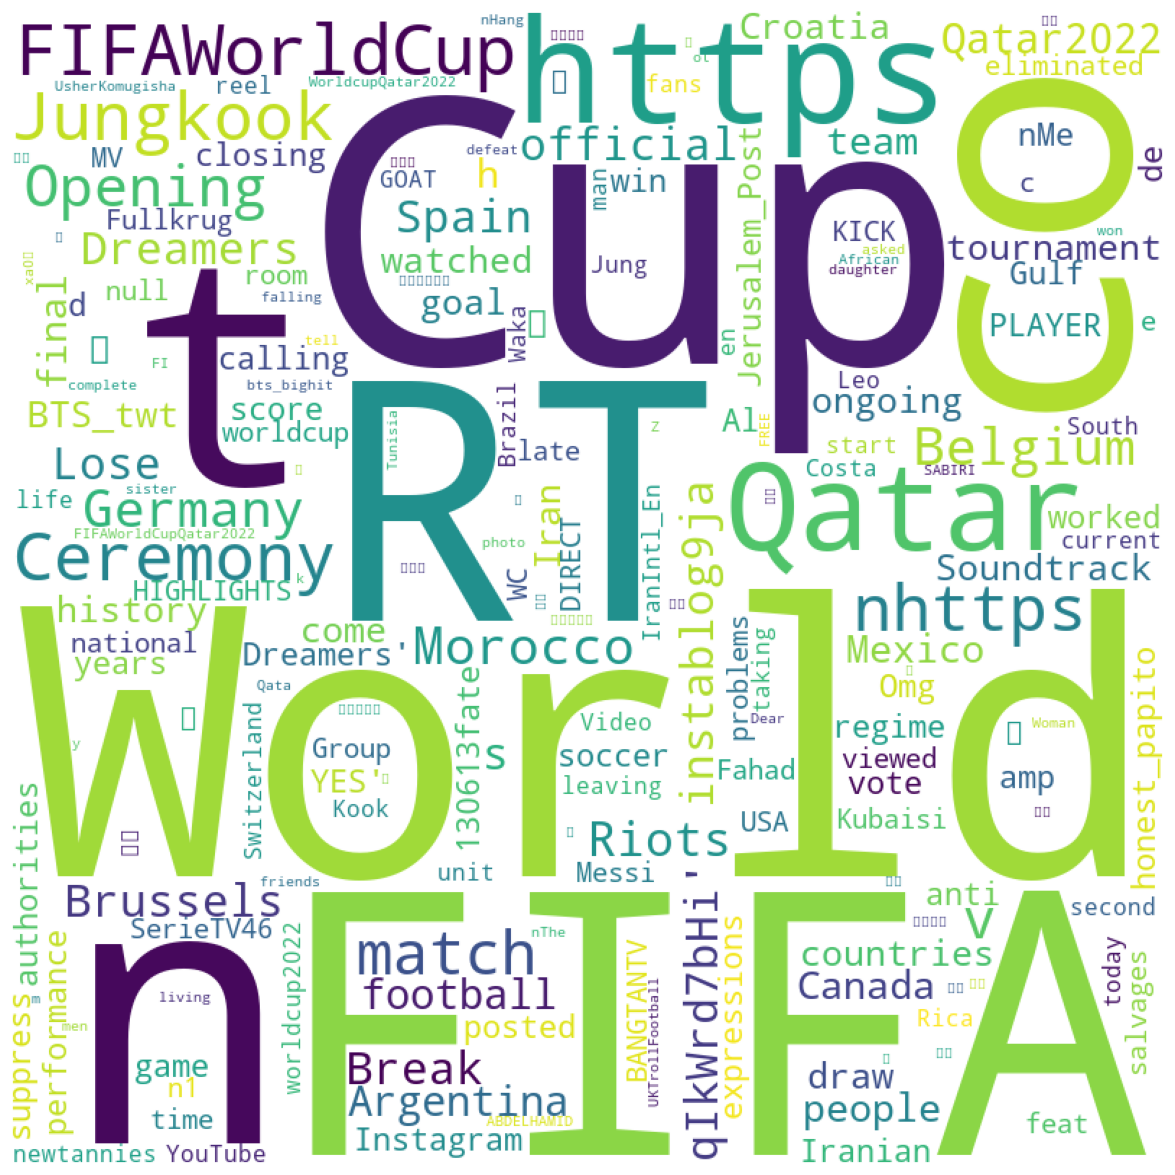

In [51]:
plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [52]:
# Especifica la ruta de la fuente TrueType (.ttf)
font_path = "/path/to/your/font.ttf"
word_cloud2 = WordCloud(collocations = False,font_path=font_path,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df2["text"].values))

In [1]:
from wordcloud import WordCloud
import matplotlib.font_manager

# Obtiene el path de las fuentes por defecto de matplotlib
default_font_path = matplotlib.font_manager.findSystemFonts()

# Muestra el path de las fuentes por defecto
print("Default Font Path:", default_font_path)

Default Font Path: ['C:\\Windows\\Fonts\\isocp2_IV25.ttf', 'C:\\Windows\\Fonts\\WINGDNG2.TTF', 'C:\\Windows\\Fonts\\YuGothB.ttc', 'C:\\Windows\\Fonts\\times.ttf', 'C:\\Windows\\Fonts\\ntailu.ttf', 'C:\\Windows\\Fonts\\calibriz.ttf', 'C:\\Windows\\Fonts\\seguisb.ttf', 'C:\\Windows\\Fonts\\swisscl.ttf', 'C:\\Windows\\Fonts\\Artifakt Element Thin Italic.ttf', 'C:\\Windows\\Fonts\\Symbol Tiger Expert.ttf', 'C:\\Windows\\Fonts\\swissci.ttf', 'C:\\Windows\\Fonts\\sanssb__.ttf', 'C:\\Windows\\Fonts\\symeteo_IV25.ttf', 'C:\\Windows\\Fonts\\isoct_IV25.ttf', 'C:\\Windows\\Fonts\\greeks__.ttf', 'C:\\Windows\\Fonts\\wingding.ttf', 'C:\\Windows\\Fonts\\seguili.ttf', 'C:\\Windows\\Fonts\\webdings.ttf', 'C:\\Windows\\Fonts\\Revit_HEB_SHX.ttf', 'C:\\Windows\\Fonts\\symeteo_.ttf', 'C:\\Windows\\Fonts\\segoeprb.ttf', 'C:\\Windows\\Fonts\\Artifakt Element Medium Italic.ttf', 'C:\\Windows\\Fonts\\eucsym.ttf', 'C:\\Windows\\Fonts\\LeelUIsl.ttf', 'C:\\Windows\\Fonts\\calibri.ttf', 'C:\\Windows\\Fonts\\symat

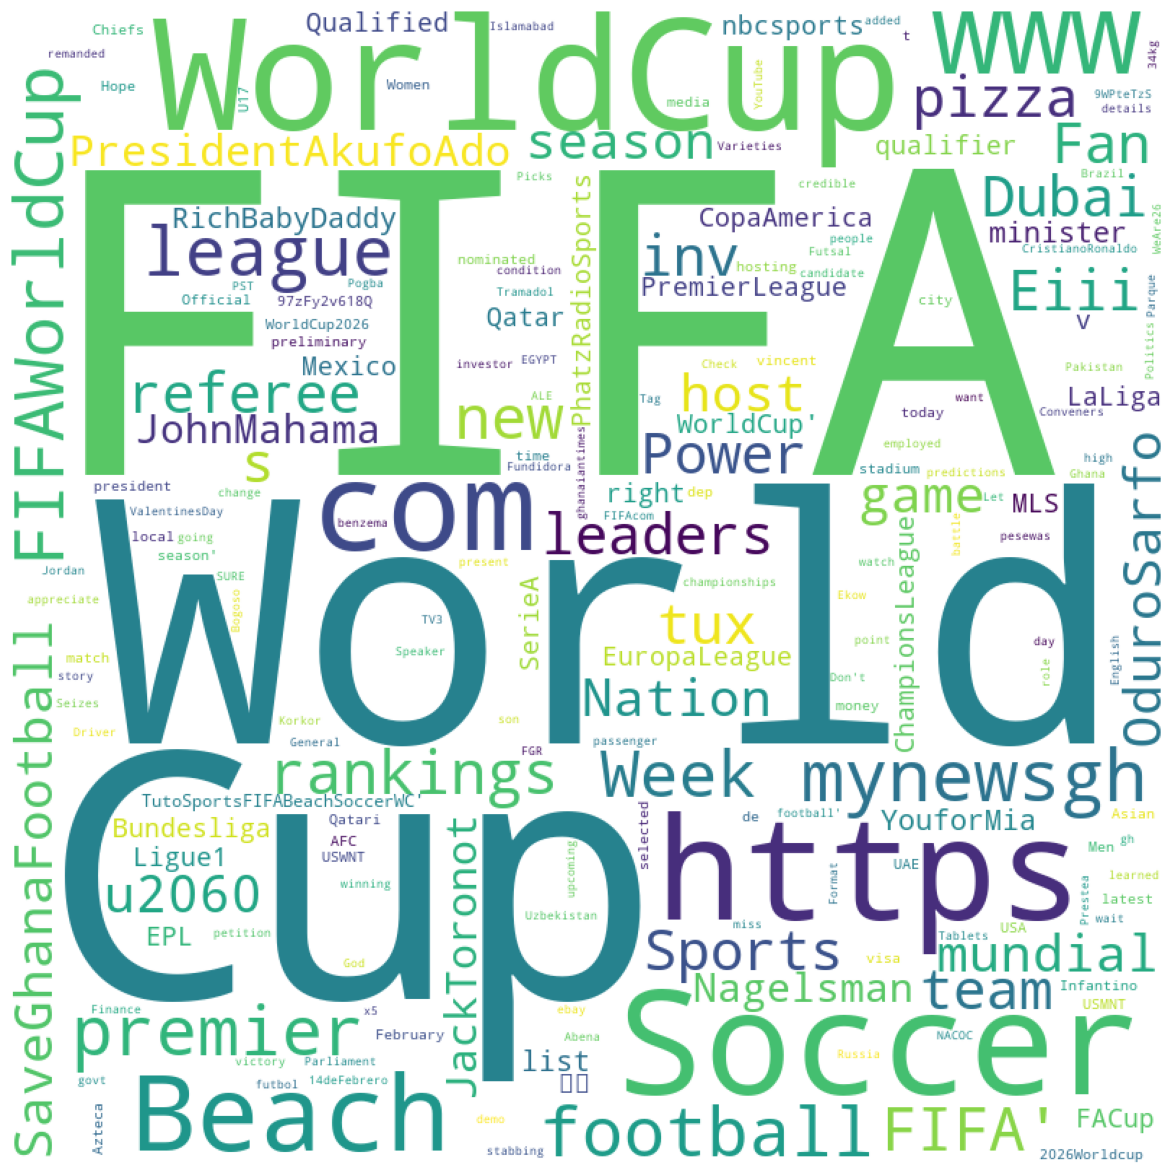

In [53]:
plt.figure(figsize=(15,15))
plt.imshow(word_cloud2)
plt.axis("off")
plt.show()

# Text blob

Para análisis de sentimientos, podemos entrenar nuestros propios modelos (como la clase pasada) o utilizar modelos ya entrenados (textblob, modelos de proveedores cloud como aws, azure, gcp, etc).

En este caso utilizaremos textblob.

In [54]:
%pip install textblob

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.5 MB 812.7 kB/s eta 0:00:02
     -------- ------------------------------- 0.3/1.5 MB 2.4 MB/s eta 0:00:01
     -------------------- ------------------- 0.8/1.5 MB 4.5 MB/s eta 0:00:01
     ------------------------------------- -- 1.4/1.5 MB 6.4 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 6.0 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------------------------------------ -- 593.9/626.3 kB 12.4 MB/s eta 0:00:01
   --------------------------------------- 626.3/626.3 kB 13.1 MB/s eta 0:00:00
   ---------

In [26]:
from textblob import TextBlob

In [29]:
TextBlob("""I love hate this movie""").sentiment

Sentiment(polarity=-0.15000000000000002, subjectivity=0.75)

In [30]:
TextBlob("""I love this movie""").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

Si queremos solo polarity:

In [32]:
TextBlob("""My dog is beautiful""").sentiment.polarity

0.85

POLARITY

Puede tomar valores en el rango [-1, 1], donde -1 define un sentimiento negativo y 1 un sentimiento positivo.
Las palabras de negación, invierten la polaridad. 

SUBJECTIVITY

Puede tomar valores en el rango [0, 1].
Cuantifica la cantidad de opinión personal que contiene el texto. Mientras más alta sea, significa que el texto contiene muchas opiniones personales en lugar de información basada en hechos.

EJERCICIO:

Escribir una función get_sentiment que dado un texto, nos retorne:
- la palabra "POS" si polarity > 0.1
- la palabra "NEU" si polarity ≥ -0.1 & polarity ≤ 0.1
- la palabra "NEG" si polarity < -0.1

Luego aplicarla a todo el df y almacenar resultados en la columna "SENTIMENT"

In [35]:
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.1:
    return "POS"
  
  if sent >= -0.1 and sent <= 0.1:
    return "NEU"

  if sent < 0.1:
    return "NEG"

In [40]:
def fget_sents(text,method="pol",up=0.1,un=-0.1):
  if method=='pol':
    sent = TextBlob(text).sentiment.polarity
    if sent < un:
      return -1
    elif sent > up:
      return 1
    else:
      return 0
  
  elif method=='sub':
    sent = TextBlob(text).sentiment.subjectivity
    if sent > up:
      return 1
    elif sent > un:
      return 0.5
    else:
      return 0

  

In [36]:
get_sentiment("I love my dog")

'POS'

In [50]:
fget_sents("I love my dog",method='pol',up=0.1,un=-0.1)

1

In [61]:
df["SENTIMENT"] = df["TWEET"].apply(get_sentiment)

In [62]:
df.head()

,TWEET,NER,NOUNS,NOUN_CHUNKS,SENTENCES,SENTIMENT
0,Fifa World Cup: Germany keep hopes alive after...,"[Fifa World Cup, Germany, 1-1, Spain]","[hopes, draw]","[(Germany), (hopes), (1, -, 1, draw), (Spain)]",1,NEU
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Of...","[Jung Kook, World Cup 2022 Official Soundtrack]","[@FIFAWorldCup, Dreamers, |, Dream]","[(RT, @FIFAWorldCup), ((, Jung, Kook), ("", Dre...",2,NEU
2,RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FI...,"[YouTube 📊📽, FIFA World Cup, 30, Millones]","[@MinMxLove1, 📽, Dreamers, opening, ceremony, ...","[(RT, @MinMxLove1), (YouTube, 📊, 📽, ️, \n\n, D...",3,NEU
3,RT @Jungkook_SNS: “Dreamers” by JungKook is no...,"[JungKook, Instagram, Waka Waka, Shakira]","[Dreamers, song, audio]","[(RT), (“, Dreamers), (JungKook), (the, Most, ...",2,POS
4,"RT @SerieTV46: ""Dreamers (FIFA World Cup 2022 ...","[World Cup 2022 Soundtrack, JUNGKOOK, Fahad Al...","[Dreamers, Soundtrack, #, JUNGKOOK, @BTS_twt, ...","[(RT, @SerieTV46), (:, "", Dreamers), (FIFA, Wo...",3,POS


In [63]:
df2["SENTIMENT"] = df2["text"].apply(get_sentiment)

In [64]:
df2.head()

,date,user,text,likes,comments,retweets,quotes,NER,NOUNS,NOUN_CHUNKS,SENTENCES,SENTIMENT
0,"Feb 17, 2024 · 7:50 AM UTC",@Netherlands1974,Unique footage of the celebrations in the #Net...,23,2,4,0,"[WestGermany/#BRD, 2nd, 1, Holland, #, #, #FIF...","[footage, celebrations, minute, penalty, spot,...","[(Unique, footage), (the, celebrations), (the,...",3,POS
1,"Feb 17, 2024 · 6:53 AM UTC",@Khalil3Asa,The #FIFABeachSocce WorldCup 2024 has started ...,0,0,0,0,"[#FIFABeachSocce WorldCup, 2024, Dubai Design ...","[#, thrilling, contests, 25th, Soccer, #, Dubai]","[(The, #, FIFABeachSocce, WorldCup), (Dubai, D...",3,POS
2,"Feb 17, 2024 · 6:40 AM UTC",@PyaraBetaa,This is old Gem Maradona preparing for the Wo...,0,0,0,0,"[Gem Maradona, the World Cup, #]","[History, #, football, maradona]","[(This), (old, Gem, , Maradona), (the, World,...",1,NEU
3,"Feb 16, 2024 · 6:57 PM UTC",@StanisElsborg,It would be interesting if someone were to ana...,6,1,3,0,"[2026, #FIFA World Cup, @ole_waever]","[lens, term, ️, thread]","[(It), (someone), (the, 2026, #, FIFA, World, ...",1,POS
4,"Feb 16, 2024 · 9:05 PM UTC",@CaptainTurbo3,https://inv.tux.pizza/watch?v=xasNk_jHPP8 #FIF...,0,0,0,0,"[EGYPT, Brazil]",[Smallyoutuber],"[(https://inv.tux.pizza/watch?v=xasNk_jHPP8, #...",1,NEU


Ahora ya tenemos muchos datos sobre nuestro texto: Entidades, sustantivos, cantidad de oraciones, sentimiento.

Con todos estos datos, responder:

1) Cuántas ORACIONES hay asociadas a cada sentimiento (POS, NEG, NEU) ?

In [65]:
df.groupby("SENTIMENT").agg({"SENTENCES": "sum"})

,SENTENCES
SENTIMENT,
NEG,22
NEU,127
POS,45


In [66]:
df2.groupby("SENTIMENT").agg({"SENTENCES": "sum"})

,SENTENCES
SENTIMENT,
NEG,18
NEU,71
POS,58


2) Cuáles son los 10 sustantivos más negativos? Y los más positivos? (Noun)

In [67]:
noun_sentiments = df.explode("NOUNS").groupby(["NOUNS", "SENTIMENT"], as_index=False).agg({"TWEET": "count"})
noun_sentiments.head()

,NOUNS,SENTIMENT,TWEET
0,#,NEU,6
1,#,POS,4
2,+102,NEU,1
3,@BTS_twt,NEG,1
4,@BTS_twt,POS,3


In [ ]:
noun_sentiments[noun_sentiments.SENTIMENT == "NEG"].sort_values(by="TWEET", ascending=False).head(10)

,NOUNS,SENTIMENT,TWEET
0,#,NEG,2
83,daughter,NEG,2
167,sister,NEG,2
161,room,NEG,2
146,photo,NEG,2
128,living,NEG,2
97,friends,NEG,2
218,천재꾀꼬리가,NEG,2
14,@bts_bighit,NEG,2
44,Qata,NEG,2


In [ ]:
noun_sentiments[noun_sentiments.SENTIMENT == "POS"].sort_values(by="TWEET", ascending=False).head(10)

,NOUNS,SENTIMENT,TWEET
131,match,POS,10
107,history,POS,5
30,Dreamers,POS,5
38,JUNGKOOK,POS,3
13,@SerieTV46,POS,3
92,feat,POS,3
54,Soundtrack,POS,3
190,win,POS,3
36,GOAL,POS,2
101,game,POS,2
